# Kaggle Titanic

##  1) Import dependencies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 2) Load the datasets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Take a look at the data and see if we have any missing values

In [4]:
print(train.dtypes)
print(train.describe())
train.head(5)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.3815

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Look for missing data

The cabin and age features have some missing values.

In [5]:
train_missing = train.isna().mean()
train_missing

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

### Split into Women and Men and calculate the survival rates

In [6]:
women = train.loc[train['Sex'] == 'female']
women_survived = women.loc[women['Survived'] == 1]
rate_women = len(women_survived)/len(women)
print("% of women who survived:", "{:.2%}".format(rate_women))

% of women who survived: 74.20%


In [7]:
men = train.loc[train['Sex'] == 'male']
men_survived = men.loc[men['Survived'] == 1]
rate_men = len(men_survived)/len(men)
print('% of men survivors:', "{:.2%}".format(rate_men))

% of men survivors: 18.89%


##  3) Visualize the Data

Use passnger class and passenger sex

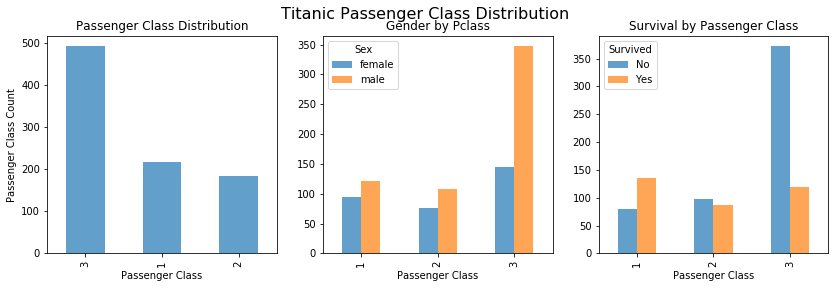

In [8]:
train = train.replace({'Survived': {0: 'No', 1: 'Yes'}})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
fig.suptitle('Titanic Passenger Class Distribution', fontsize=16)

pclass_data = train['Pclass'].value_counts()
pclass_data.plot.bar(ax=axes[0], alpha=0.7)
axes[0].set_title('Passenger Class Distribution')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Passenger Class Count')

class_sex = pd.crosstab(train['Pclass'], train['Sex'])
class_sex.plot.bar(ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Passenger Class')
axes[1].set_title('Gender by Pclass')

class_survived = pd.crosstab(train['Pclass'], train['Survived'])
class_survived.plot.bar(ax=axes[2], alpha=0.7)
axes[2].set_xlabel('Passenger Class')
axes[2].set_title('Survival by Passenger Class')

plt.show()
train = train.replace({'Survived': {'No': 0, 'Yes': 1}})

### Male Passenger Survival Rate

Text(0.5, 1.0, 'Men Survival by Passenger Class')

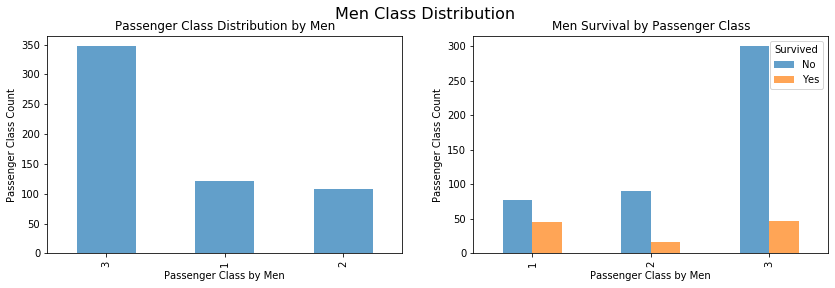

In [9]:
men = men.replace({'Survived': {0: 'No', 1: 'Yes'}})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle('Men Class Distribution', fontsize=16)

men_pclass= men['Pclass'].value_counts()
men_pclass.plot.bar(ax=axes[0], alpha=0.7)
axes[0].set_title('Passenger Class Distribution by Men')
axes[0].set_xlabel('Passenger Class by Men')
axes[0].set_ylabel('Passenger Class Count')

class_survived_men = pd.crosstab(men['Pclass'], men['Survived'])
class_survived_men.plot.bar(ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Passenger Class by Men')
axes[1].set_ylabel('Passenger Class Count')
axes[1].set_title('Men Survival by Passenger Class')

### Female Passenger Survival Rate

Text(0.5, 1.0, 'Women Survival by Passenger Class')

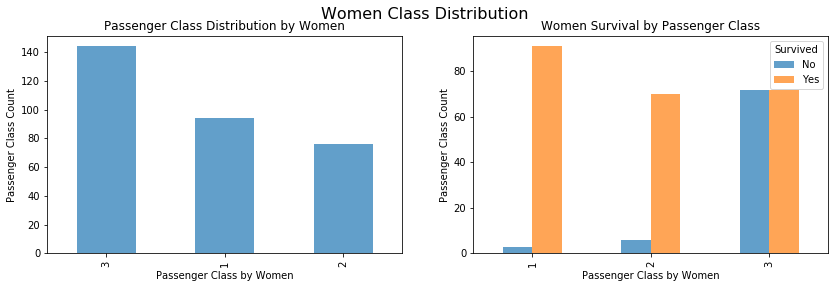

In [10]:
women = women.replace({'Survived': {0: 'No', 1: 'Yes'}})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle('Women Class Distribution', fontsize=16)

women_pclass= women['Pclass'].value_counts()
women_pclass.plot.bar(ax=axes[0], alpha=0.7)
axes[0].set_title('Passenger Class Distribution by Women')
axes[0].set_xlabel('Passenger Class by Women')
axes[0].set_ylabel('Passenger Class Count')

class_survived_women = pd.crosstab(women['Pclass'], women['Survived'])
class_survived_women.plot.bar(ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Passenger Class by Women')
axes[1].set_ylabel('Passenger Class Count')
axes[1].set_title('Women Survival by Passenger Class')

### Which titanic passengers where children?

In [11]:
def titanic_children(passenger):
    """Finding children among titanic passengers"""
    age , sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

train['person'] = train[['Age','Sex']].apply(titanic_children,axis=1)
child = train.loc[train['person'] == 'child']

### Child Passenger Survival Rate

Text(0.5, 1.0, 'Children Survival by Passenger Class')

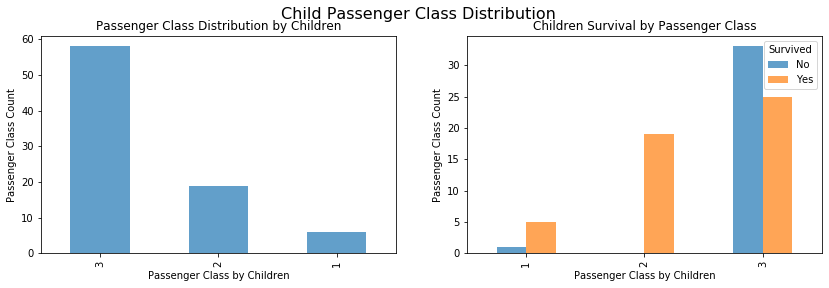

In [12]:
child = child.replace({'Survived': {0: 'No', 1: 'Yes'}})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
fig.suptitle('Child Passenger Class Distribution', fontsize=16)

child_pclass= child['Pclass'].value_counts()
child_pclass.plot.bar(ax=axes[0], alpha=0.7)
axes[0].set_title('Passenger Class Distribution by Children')
axes[0].set_xlabel('Passenger Class by Children')
axes[0].set_ylabel('Passenger Class Count')

class_survived_child = pd.crosstab(child['Pclass'], child['Survived'])
class_survived_child.plot.bar(ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Passenger Class by Children')
axes[1].set_ylabel('Passenger Class Count')
axes[1].set_title('Children Survival by Passenger Class')

###  Survival Rate by Passenger Class

In [13]:
first_class = train.loc[train['Pclass'] == 1]
second_class = train.loc[train['Pclass'] == 2]
third_class = train.loc[train['Pclass'] == 3]

print("% of 1st class who survived: ", "{:.2%}".format(first_class['Survived'].mean()))
print("% of 2nd class who survived: ", "{:.2%}".format(second_class['Survived'].mean()))
print("% of 3rd class who survived: ", "{:.2%}".format(third_class['Survived'].mean()))

% of 1st class who survived:  62.96%
% of 2nd class who survived:  47.28%
% of 3rd class who survived:  24.24%


In [14]:
first_class_male = first_class.loc[first_class['Sex'] == 'male']
first_class_female = first_class.loc[first_class['Sex'] == 'female']
second_class_male = second_class.loc[second_class['Sex'] == 'male']
second_class_female = second_class.loc[second_class['Sex'] == 'female']
third_class_male = third_class.loc[third_class['Sex'] == 'male']
third_class_female = third_class.loc[third_class['Sex'] == 'female']

### Create a survival_rate dataframe for women and men

In [15]:
survival_rate = {'Male':[first_class_male.Survived.mean(),
                       second_class_male.Survived.mean(),
                       third_class_male.Survived.mean()],
               'Female':[first_class_female.Survived.mean(),
                         second_class_female.Survived.mean(),
                         third_class_female.Survived.mean()]}

survival_df = pd.DataFrame(data=survival_rate,
                           index=['First Class', 'Second Class','Third Class'])

###  Plot Survival Rates for Men and Women by Passenger Class

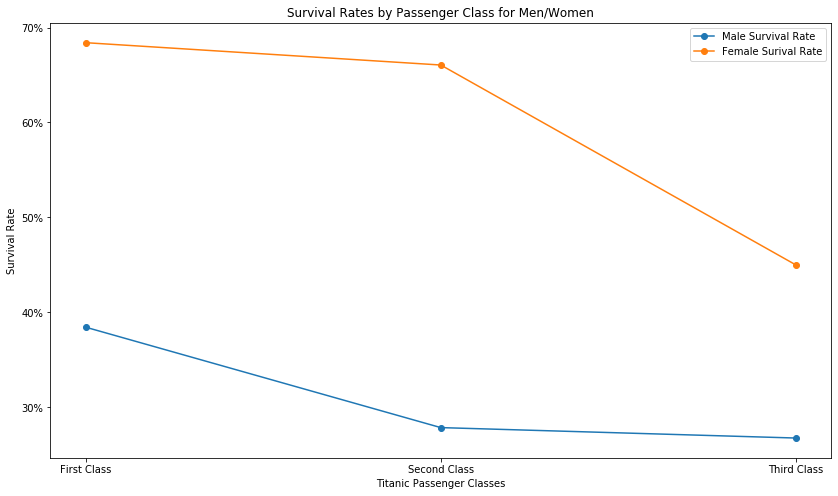

In [17]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(survival_df['Male'], marker='o', label='Male Survival Rate')
ax.plot(survival_df['Female'], marker='o', label='Female Surival Rate')

plt.title("Survival Rates by Passenger Class for Men/Women")
ax.set_xlabel("Titanic Passenger Classes")
ax.set_ylabel("Survival Rate")
ax.set_yticklabels(['20%','30%','40%','50%','60%','70%'])
plt.legend()

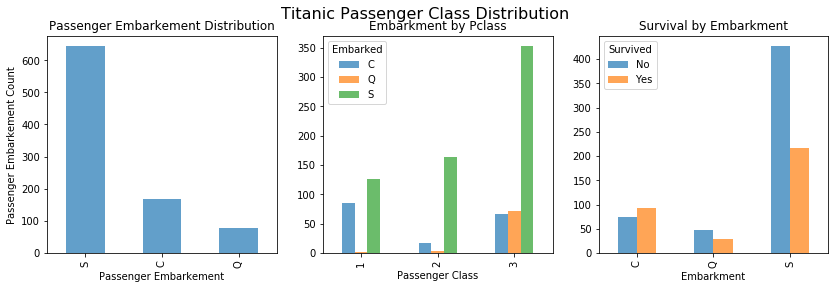

In [18]:
train = train.replace({'Survived': {0: 'No', 1: 'Yes'}})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
fig.suptitle('Titanic Passenger Class Distribution', fontsize=16)

embark_data = train['Embarked'].value_counts()
embark_data.plot.bar(ax=axes[0], alpha=0.7)
axes[0].set_title('Passenger Embarkement Distribution')
axes[0].set_xlabel('Passenger Embarkement')
axes[0].set_ylabel('Passenger Embarkement Count')

embark_class = pd.crosstab(train['Pclass'], train['Embarked'])
embark_class.plot.bar(ax=axes[1], alpha=0.7)
axes[1].set_xlabel('Passenger Class')
axes[1].set_title('Embarkment by Pclass')

embark_survived = pd.crosstab(train['Embarked'], train['Survived'])
embark_survived.plot.bar(ax=axes[2], alpha=0.7)
axes[2].set_xlabel('Embarkment')
axes[2].set_title('Survival by Embarkment')

plt.show()

train = train.replace({'Survived': {'No' : 0, 'Yes' : 1}})

## 4) Split the train data set into a smaller train/test sets for model validation

In [19]:
from sklearn.model_selection import train_test_split

model_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(train[model_features]), train['Survived'],
                                                    random_state = 0) 

print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

X_train shape: (668, 5)
y_train shape: (668,)
X_test shape: (223, 5)
y_test shape: (223,)


## 5) Import, fit, and use model for predictions on training set

### Logisitc Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C=1)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

print("Training set score: {:.2%}".format(logreg_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(logreg_model.score(X_test, y_test)))

Training set score: 80.39%
Test set score: 78.92%


C:\Users\simon\Anaconda3\envs\Beatport\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Adjusting for the strength of the regularization with hyperparameter C

when you use a high value for the parameter C the model will try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

In [21]:
logreg100_model = LogisticRegression(C=100)
logreg100_model.fit(X_train, y_train)
logreg100_predictions = logreg_model.predict(X_test)

print("Training set score: {:.2%}".format(logreg100_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(logreg100_model.score(X_test, y_test)))

Training set score: 80.39%
Test set score: 78.92%


C:\Users\simon\Anaconda3\envs\Beatport\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
logreg001_model = LogisticRegression(C=.01)
logreg001_model.fit(X_train, y_train)
logreg001_predictions = logreg_model.predict(X_test)

print("Training set score: {:.2%}".format(logreg001_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(logreg001_model.score(X_test, y_test)))

Training set score: 78.14%
Test set score: 78.48%


C:\Users\simon\Anaconda3\envs\Beatport\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Coefficient Magnitude

Features with high or low coefficient magnitudes, indicate a high correlation with target variable.

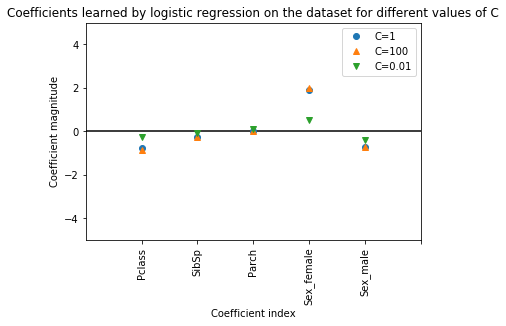

In [23]:
plt.plot(logreg_model.coef_.T, 'o', label="C=1") 
plt.plot(logreg100_model.coef_.T, '^', label="C=100") 
plt.plot(logreg001_model.coef_.T, 'v', label="C=0.01") 
plt.xticks(range(train.shape[1]), list(X_train.columns.values), rotation=90) 
plt.hlines(0, -1, train.shape[1]) 

plt.xlim(-1, 5)
plt.ylim(-5, 5)
plt.title("Coefficients learned by logistic regression on the dataset for different values of C")
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()

###  Linear Support Vector Machines

In [24]:
from sklearn.svm import LinearSVC

linearSVC_model = LinearSVC()
linearSVC_model.fit(X_train, y_train)
linearSVC_predictions = linearSVC_model.predict(X_test)

print("Training set score: {:.2%}".format(linearSVC_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(np.mean(linearSVC_predictions == y_test)))

Training set score: 79.64%
Test set score: 78.48%


C:\Users\simon\Anaconda3\envs\Beatport\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Adjusting for the strength of the regularization with hyperparameter C

In [25]:
linearSVC100_model = LinearSVC(C=100)
linearSVC100_model.fit(X_train, y_train)
linearSVC100_predictions = linearSVC100_model.predict(X_test)

print("Training set score: {:.2%}".format(linearSVC100_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(np.mean(linearSVC100_predictions == y_test)))

Training set score: 75.00%
Test set score: 76.68%


C:\Users\simon\Anaconda3\envs\Beatport\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
linearSVC001_model = LinearSVC(C=.01)
linearSVC001_model.fit(X_train, y_train)
linearSVC001_predictions = linearSVC001_model.predict(X_test)

print("Training set score: {:.2%}".format(linearSVC001_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(np.mean(linearSVC001_predictions == y_test)))

Training set score: 79.64%
Test set score: 78.48%


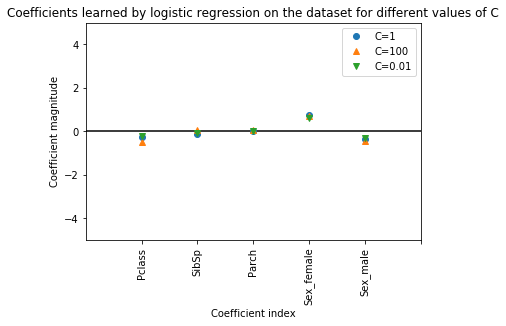

In [27]:
plt.plot(linearSVC_model.coef_.T, 'o', label="C=1") 
plt.plot(linearSVC100_model.coef_.T, '^', label="C=100") 
plt.plot(linearSVC001_model.coef_.T, 'v', label="C=0.01") 
plt.xticks(range(train.shape[1]), list(X_train.columns.values), rotation=90) 
plt.hlines(0, -1, train.shape[1]) 

plt.xlim(-1, 5)
plt.ylim(-5, 5)
plt.title("Coefficients learned by logistic regression on the dataset for different values of C")
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude") 
plt.legend()

###  Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Training set score: {:.2%}".format(rf_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(np.mean(rf_predictions == y_test)))

Training set score: 81.74%
Test set score: 80.27%


###  K-Nearest Neighbors Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
KNN_predictions = KNN_model.predict(X_test)

print("Training set score: {:.2%}".format(KNN_model.score(X_train, y_train))) 
print("Test set score: {:.2%}".format(np.mean(KNN_predictions == y_test)))

Training set score: 81.59%
Test set score: 77.58%


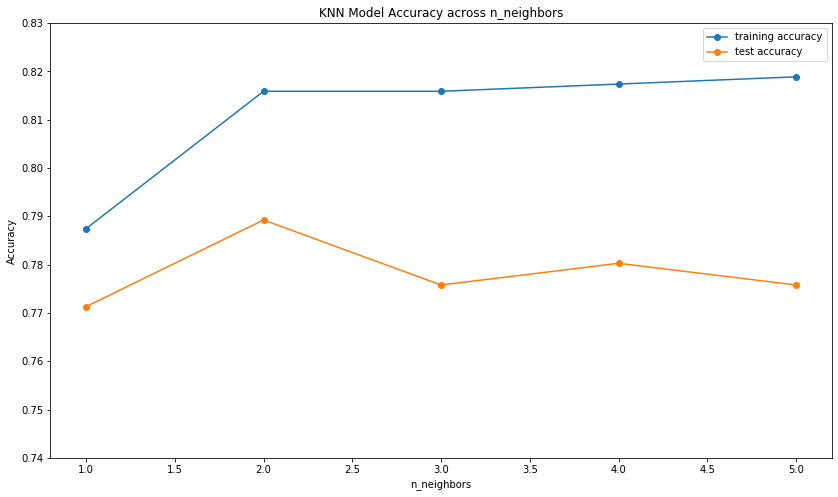

In [30]:
training_accuracy = [] 
test_accuracy = [] 
# try n_neighbors from 1 to 6 
neighbors_settings = range(1, 6)

for n_neighbors in neighbors_settings:
    # build the model
    KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN_model.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(KNN_model.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(KNN_model.score(X_test, y_test))

fig = plt.figure(figsize=(14, 8))
plt.title("KNN Model Accuracy across n_neighbors")
plt.plot(neighbors_settings, training_accuracy, 
         label="training accuracy",marker='o') 
plt.plot(neighbors_settings, test_accuracy, 
         label="test accuracy",marker='o') 
plt.ylabel("Accuracy") 
plt.xlabel("n_neighbors") 
plt.yticks(np.arange(.74, .84, .01))
plt.legend()

In [31]:
# reset X_test to the test dataset features (was previously from train dataset)
X_test = pd.get_dummies(test[model_features])

# fit logreg_model, rf_model, and KNN_model to test dataset features
logreg_test_predictions = logreg_model.predict(X_test)
linearSVC_test_predictions = linearSVC_model.predict(X_test)
rf_test_predictions = rf_model.predict(X_test)
KNN_test_predictions = KNN_model.predict(X_test)

In [28]:
logreg_output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': logreg_test_predictions})
logreg_output.to_csv('logreg_submission.csv', index=False)

In [29]:
linearSVC = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': linearSVC_test_predictions})
linearSVC.to_csv('linearSVC_submission.csv', index=False)

In [30]:
rf_output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': rf_test_predictions})
rf_output.to_csv('rf_submission.csv', index=False)

In [31]:
KNN_output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': KNN_test_predictions})
KNN_output.to_csv('KNN_submission.csv', index=False)